In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

sns.set(style='ticks', context='talk', color_codes=True)
%matplotlib inline

In [2]:
df = pd.read_excel('default of credit card clients.xls', skiprows=[1])

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

Split data into train and test datasets.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

## Random forests

In [5]:
scl = StandardScaler()
rf = RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=123)
rf_pipe = Pipeline([('scl', scl), ('rf', rf)])

In [6]:
params = {'criterion': ['gini', 'entropy'], 'max_depth': [8, 10, None],
          'min_samples_leaf': [2, 3, 4], 'min_samples_split': [2,3,4]}
rf_grid = GridSearchCV(rf, params, n_jobs=-1)

In [7]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [8, 10, None], 'min_samples_leaf': [2, 3, 4], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [8]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [10]:
print('Training accuracy: ', rf_grid.score(X_train, y_train), '\nTest accuracy: ', rf_grid.score(X_test, y_test))

Training accuracy:  0.834666666667 
Test accuracy:  0.814333333333


##  Gradient descent classifier

In [11]:
sgd = SGDClassifier(loss="log", penalty="elasticnet", alpha=0.001,l1_ratio=0.9, max_iter=1000, n_jobs=-1)
sgd_pipe =  Pipeline([('scl', scl), ('sgd', sgd)])

In [12]:
sgd_pipe.fit(X_train, y_train)
print('Training accuracy: ', sgd_pipe.score(X_train, y_train), '\nTest accuracy: ', sgd_pipe.score(X_test, y_test))

Training accuracy:  0.812291666667 
Test accuracy:  0.805833333333


### Hyperparameter tuning

In [13]:
sgd_params = {'sgd__alpha': [10**c for c in range(-4, 2)], 
              'sgd__l1_ratio': [0.5, 0.8, 0.9, 0.95, 0.99, 1]}
sgd_grid = GridSearchCV(sgd_pipe, sgd_params, n_jobs=-1)

In [14]:
sgd_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sgd', SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.9, learning_rate='optimal',
       loss='log', max_iter=1000, n_iter=None, n_jobs=-1,
       penalty='elasticnet', power_t=0.5, random_state=None, shuffle=True,
       tol=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'sgd__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'sgd__l1_ratio': [0.5, 0.8, 0.9, 0.95, 0.99, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [15]:
sgd_grid.best_estimator_

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sgd', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.95,
       learning_rate='optimal', loss='log', max_iter=1000, n_iter=None,
       n_jobs=-1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [16]:
print('Training accuracy: ', sgd_grid.score(X_train, y_train), '\nTest accuracy: ', sgd_grid.score(X_test, y_test))

Training accuracy:  0.813166666667 
Test accuracy:  0.8075


## Logistic regression

In [17]:
lr = LogisticRegression(random_state=123)
lr_pipe = Pipeline([('scl', scl), ('lr', lr)])
lr_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [18]:
print('Traing accuracy: ', lr_pipe.score(X_train, y_train), 'Test accuracy: ', lr_pipe.score(X_test, y_test))

Traing accuracy:  0.812666666667 Test accuracy:  0.806166666667


### Hyparameter tuning

In [19]:
lr_params = {'lr__C': [10**c for c in range(-4, 4)]}
lr_grid = GridSearchCV(lr_pipe, lr_params)
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'lr__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [20]:
lr_grid.best_estimator_

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [21]:
print('Traingin accuracy: ', lr_grid.score(X_train, y_train), 'Test accuracy: ', lr_grid.score(X_test, y_test))

Traingin accuracy:  0.812666666667 Test accuracy:  0.806166666667


## Boosting trees

In [22]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=20, random_state=123, learning_rate=0.1)

In [23]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=20, random_state=123)

In [25]:
print('Training accuracy: ', ada.score(X_train, y_train), 'Test accuracy: ', ada.score(X_test, y_test))

Training accuracy:  0.826833333333 Test accuracy:  0.815666666667


## LightGBM

In [26]:
lgb = LGBMClassifier(learning_rate=0.1, max_depth=5, n_estimators=10, n_jobs=-1, random_state=11)

In [27]:
lgb.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.1,
        max_bin=255, max_depth=5, min_child_samples=10, min_child_weight=5,
        min_split_gain=0.0, n_estimators=10, n_jobs=-1, num_leaves=31,
        objective=None, random_state=11, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=50000,
        subsample_freq=1)

In [28]:
print('Training accuracy: ', lgb.score(X_train, y_train), 'Test accuracy: ', lgb.score(X_test, y_test))

Training accuracy:  0.826708333333 Test accuracy:  0.816666666667


## XGBoost

In [29]:
xgb = XGBClassifier(seed = 0, learning_rate=0.05, max_depth=4, n_estimators=12, n_jobs=-1, random_state=11, base_score=0.47)

In [30]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.47, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=12,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=11, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=0, silent=True, subsample=1)

In [31]:
print('Training accuracy: ', xgb.score(X_train, y_train), 'Test accuracy: ', xgb.score(X_test, y_test))

Training accuracy:  0.82575 Test accuracy:  0.817


Text(0,0.5,'True Positive Rate')

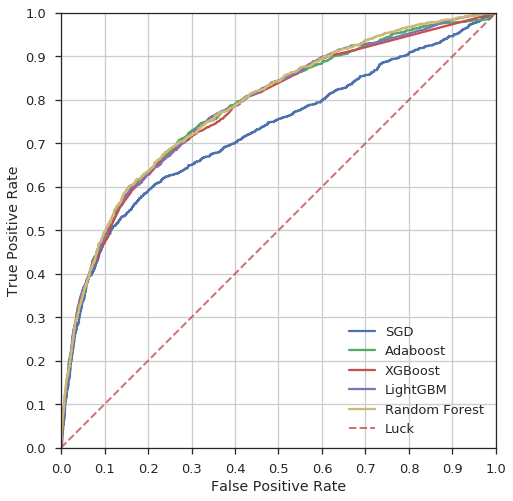

In [32]:
# plot the roc curve
from sklearn.metrics import roc_curve, auc
y_score = sgd_grid.predict_proba(X_test)[:, 1]
y_score2 = ada.predict_proba(X_test)[:, 1]
y_score3 = xgb.predict_proba(X_test)[:, 1]
y_score4 = lgb.predict_proba(X_test)[:, 1]
y_score5 = rf_grid.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_score2, pos_label=1)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_score3, pos_label=1)
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_score4, pos_label=1)
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_score5)
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='SGD')
plt.plot(fpr2, tpr2, label='Adaboost')
plt.plot(fpr3, tpr3, label='XGBoost')
plt.plot(fpr4, tpr4, label='LightGBM')
plt.plot(fpr5, tpr5, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.gca().set_aspect('equal')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')